# python中的概率与统计函数。主要分为两部分：numpy和scipy

## 第一部分：numpy中的概率分布与统计函数

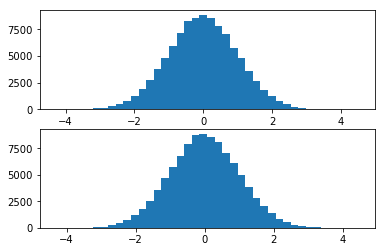

In [4]:
import numpy as np
import matplotlib.pyplot as plt
a=np.random.randn(100000)
b=np.random.standard_normal(100000)
fig,ax=plt.subplots(2)
ax[0].hist(a,bins=40)
ax[1].hist(b,bins=40)
plt.show()

1、模拟随机变量simulating random variables

1.1 核心随机数生成器core random number generators
* rand,random_sample:  0-1的均匀分布  前者接受不定数量的整数作为参数（表示生成的维度）；而后者只接受以元组形式表示的维度参数
* randn,standard_normal:  标准正态分布  参数引入方式与上述一致
* randint,random_integers:  整数均匀分布  二者的参数形式为（left,right,(dims)）
1.2 随机数组函数random array function
* shuffle:  对已存在的数组元素重新随机排列  参数就是已存在的数组
* permutation:  与shuffle相似，只是permutation不改变原数组，而是copy了一份
1.3 其他select random number generators
* binomial(1,p)，binomial(1,p,(dims))：  Bernoulli分布/两点分布
* beta(a,b),beta(a,b,(dims)):  beta分布
* binomial(n,p),binomial(n,p,(dims)):  二项分布
* chisquare(nu):  卡方分布
* exponential(lambda),exponential(lambda,(dims))：  指数分布
* f(v1,v2),f(v1,v2,(dims)):  f分布
* gamma(a):  Gamma(alpha,1)分布
* gamma(a,theta,(dims)):  Gamma(alpha,theta)
* laplace(),laplace(loc,scale,(dims)):  Laplace分布/双指数分布，前者默认loc=0,scale=1
* lognormal(),lognormal(mu,sigma,(dims)):  对数正态
* multinomial(n,p),multinomial(n,p,(dims)):  多项分布，p为元素和为一的k-维数组
* multivariate_normal(mu,sigma),multivariate_normal(mu,sigma,(dims)):  多元正态前者k维，后者dims * k维度
* normal(),normal(mu,sigma,(dims)):   正态分布
* poisson(),poisson(lambda,(dims)):   泊松分布
* standard_t(nu),standard_t(nu,(dims)):   学生氏t分布
* uniform(),uniform(los,high,(dims)):   均匀分布

In [11]:
import numpy as np
a=np.random.rand(6,6)
b=np.random.gamma(10,2,(6,6))
print(a)
print('b:',b)

[[ 0.45541455  0.34519114  0.38035817  0.13596256  0.09770079  0.90587807]
 [ 0.66858928  0.11530243  0.0070134   0.70220992  0.07741777  0.48582076]
 [ 0.83629947  0.48757787  0.31412497  0.99734468  0.21299632  0.32901533]
 [ 0.59240841  0.78519985  0.06362882  0.5358063   0.77756473  0.11088861]
 [ 0.90395881  0.77649987  0.33622843  0.43588162  0.5180097   0.8706856 ]
 [ 0.99403051  0.87630738  0.47054876  0.35361306  0.47767731  0.43029207]]
b: [[ 28.02233546  18.45563017   8.19815659  22.84379309  21.36690746
   26.47822942]
 [ 31.48059425  16.45206226  18.69631455  23.84889509  21.46299497
   17.32223823]
 [  5.5833815   23.77121471  23.53332777  11.51882654  27.06626443
   15.17941931]
 [ 16.15900861  16.55015904  25.11391145  25.07206488  24.06788781
   23.72963073]
 [ 23.52225461  12.35424019  39.30544866  22.87101896  18.93941171
   21.77803372]
 [ 18.61855629  10.34898514  24.48253678  35.33144201  30.36237926
   10.90541595]]


2、 模拟和随机数生成simulation and random number generation
* RandomState()用于控制随机数生成器
2.1 state:若随机数生成器的state相同，则同一分布会生成相同的随机数
* 可用np.random.get_state()获取state
2.2 seed：np.random.seed()是一个更实用的初始化生成器的函数
* seed()随机初始化
* seed(s)选择特定的初始化,注意s为int64类

In [13]:
import numpy as np
gen1=np.random.RandomState()
gen2=np.random.RandomState()
state1=gen1.get_state()
gen2.set_state(state1)
sample1=gen1.uniform(0,1,(6,6))
sample2=gen2.uniform(0,1,(6,6))
sample1==sample2

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]], dtype=bool)

In [15]:
import numpy as np
np.random.seed(6)
a=np.random.randn()
np.random.seed(6)
b=np.random.randn()
a==b

True

3、常用统计函数
* mean
* median
* std
* var
* corrcoef
* cov
* histgram
* histgram2d

## 第二部分 scipy中的概率分布与统计函数：随机数生成器，概率分布和统计检验

* import scipy
* import scipy.stats as stats

1、连续随机变量continuous random variables
* dist.rvs(*args,loc=0,scale=1,size=(dims))：  抽样
* dis.pdf(x,*args,loc=0,scale=1),其中x为自变量数组：  密度函数
* dist.logpdf(x,*args,loc=0,scale=1),其中x为自变量数组：  对数密度
* dist.cdf(x,*args,loc=0,scale=1),其中x为自变量数组：  累积分布
* dsit.logcdf(x,*args,**kwargs)：
* dist.ppf(p,*args,loc=0,scale=1),其中p为元素取值范围为0-1的数组：  逆cdf函数
* dist.sf(x,*args,**kwargs)：
* dist.logsf(x,*args,**kwargs)：
* dist.isf(p,*args,**kwargs)：
* dist.mean(*args,loc=0,scale=1)
* dist.median(r,*args,loc=0,scale=1)  其中r为矩的阶数,注意：非中心矩 
* dist.moment(n,*args,**kwargs)：
* dist.entropy(*args,**kwargs)：
* dist.stats(*args,**kwargs)：
* dist.expect([func,args,loc,scale,lb,ub,...])
* dist.var
* dist.std
* dist.interval(alpha,*args,**kwargs)：
* dist.fit(data,*args,floc=0,fscale=1),其中x为自变量数组，return MLEs for shape(if applicable), location, adn scale parameters from data
* dist.fit_loc_scale(data,*args)：estimate loc and scale parameters from data using 1st and 2nd moments
* dist.nnlf(theta,x)：return negative loglikelihood function


2、连续分布

2.1 常见的分布
* norm
* beta
* cauchy
* chi2
* expon
* exponpow
* f
* gamma
* gompertz
* laplace
* levy
* logistic
* lognorm
* skewnorm
* t
* uniform
* wald

2.2 多元分布
* multivariate_normal
* matrix_normal
* dirichlet
* wishart
* invwishart
* multinomial
* special_ortho_group
* ortho_group
* random_coorelation


2.3 不常见的分布
* alpha
* anglit
* arcsine
* betaprime
* bradford
* burr
* burr12
* chi
* cosine
* dgamma
* dweibull
* erlang
* exponnorm
* exponweib
* fatiguelife
* fisk
* foldcauchy
* foldnorm
* frechet
* frechet_r
* frechet_l
* genlogistic
* gennorm
* genpareto
* genexpon
* genextreme
* gausshyper
* gengamma
* genhalflogistic
* gilbrat



In [20]:
import scipy.stats as stats
gamma=stats.gamma
m,md=gamma.mean(2),gamma.median(2)
var1=gamma.moment(2,2)-gamma.moment(1,2)**2#方差
var2=gamma.var(2)#方差
var3=gamma.moment(2,2,loc=-gamma.mean(2))#方差,利用位置参数將中心转至零点
print(m,md,var1,var2,var3)

2.0 1.67834699002 2 2.0 2.0


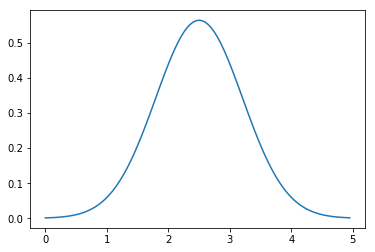

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
x=np.linspace(0,5,100,endpoint=False)
y=multivariate_normal.pdf(x,mean=2.5,cov=0.5)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x,y)
plt.show()

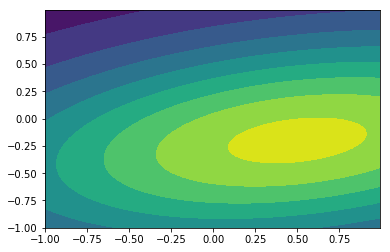

In [8]:
x,y=np.mgrid[-1:1:0.01,-1:1:0.01]
pos=np.dstack((x,y))
rv=multivariate_normal([0.5,-0.2],[[2,0.3],[0.3,0.5]])
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.contourf(x,y,rv.pdf(pos))
plt.show()

3、离散随机变量
* dist.rvs(*args,**kwargs)
* dist.pmf(k,*args,**kwargs)：在k处的probability mass function
* dist.logpmf(k,*args,**kwargs)：在k处的log of the probability mass function
* dist.cdf(k,*args,**kwargs)
* dist.logcdf(k,*args,**kwargs)
* dist.sf(k,*args,**kwargs)：survival function(1-cdf) at k
* dist.logsf(k,*args,**kwargs)
* dist(p,*args,**kwargs)：percent point function(inverse of cdf) at p
* dist.isf(p,*args,**kwargs)：inverse survival function at p
* dist.moment(n,*args,**kwargs)：n-th order non-central moment of distribution
* dist.stats(*args,**kwargs)：some statistics
* dist.entropy(*args,**kwargs)：differential entropy of the random variable
* dist.expect([func,args,loc,lb,ub,...])：calculate expected value of a function with respect to the distribution fro discrete distribution
* dist.median(*args,**kwargs)：median
* dist.mean(*args,**kwargs)：
* dist.std(*args,**kwargs)：
* dist.var(*args,**kwargs)：
* dist.interval(alpha,*args,**kwargs)：
* dist.__call__(*args,**kwargs)：freeze the distribution for the given arguments

4、离散随机变量的分布

4.1 、常见离散分布
* bernoulli
* binom
* boltzmann
* dlaplace
* geom
* hypergeom
* logser
* nbinom
* planck
* poisson
* randint
* skellam
* zipf


5、统计函数select statistics functions
* describe(a,[,axis,ddof,bias,nan_policy])
* gmean(a[,axis,dtype])
* hmean(a[,axis,dtype])
* mode(data,axis) #axis可以没有
* moment(data,order,axis)#axis没有的话，就默认cover整个数组
* skew(data,axis)    #axis可以没有
* kurtosis(data,axis,fisher=True)   #axis可以没有，fisher=True表明计算excess kurtosis(=实际的kurtosis-3)
* pearsonr(X,Y)
* spearmanr(X)
* kendalltau
* lingress
* ...


6、统计检验select statistical tests
* normaltest
* kurtosistes
* skewtest
* kstest
* ks_2samp
* shapiro
* ...
